In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar el CSV generado en el preprocesamiento
df = pd.read_csv("../data/clientes_preprocesado.csv")
df.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,...,zonas_Sur,ambito_laboral_Finanzas,ambito_laboral_Otros,ambito_laboral_Salud,ambito_laboral_Servicios Publicos,ambito_laboral_Tecnologia/Industria,Campanna_anno_1.0,Campanna_anno_3.0,Campanna_anno_4.0,Campanna_anno_5.0
0,0,1,1.036719,1,2,0,3,-1.036493,1,1.052557,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0.873632,1,2,1,2,-0.873404,1,1.231266,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0.927994,1,2,1,3,-0.927767,1,-0.547295,...,0,0,0,0,0,0,0,1,0,0
3,1,0,-0.811600,0,1,0,4,0.811856,2,-0.889922,...,0,0,0,0,1,0,0,0,1,0
4,1,1,0.221284,0,2,1,2,-0.221045,1,-0.742655,...,0,0,1,0,0,0,0,0,0,0


In [3]:
# Seleccionar solo las columnas numéricas (excluyendo ID y categóricas ya codificadas)
numeric_cols = ['Edad', 'Ingresos_anuales_brutos', 'Experiencia_laboral', 'Gasto_medio_mensual_cuota', 'Dias_cliente', 'Digital_encuesta', 'Family_Size']
X = df[numeric_cols]


from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Selección de componentes principales para explicar el 95% de la varianza.
X_pca = pca.fit_transform(X)

print(f"Número de componentes seleccionados para explicar el 95% de la varianza: {pca.n_components_}")

Número de componentes seleccionados para explicar el 95% de la varianza: 2


In [4]:
# Verifica la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")

Varianza explicada por cada componente: [0.37239046 0.22592979]
Varianza total explicada: 0.5983202449073936


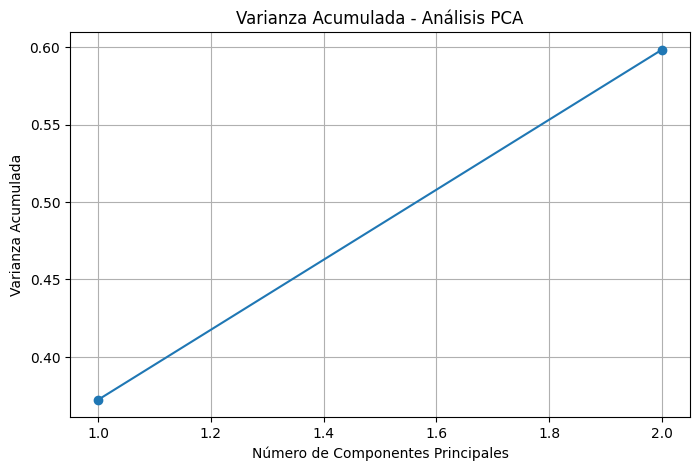

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Acumulada - Análisis PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

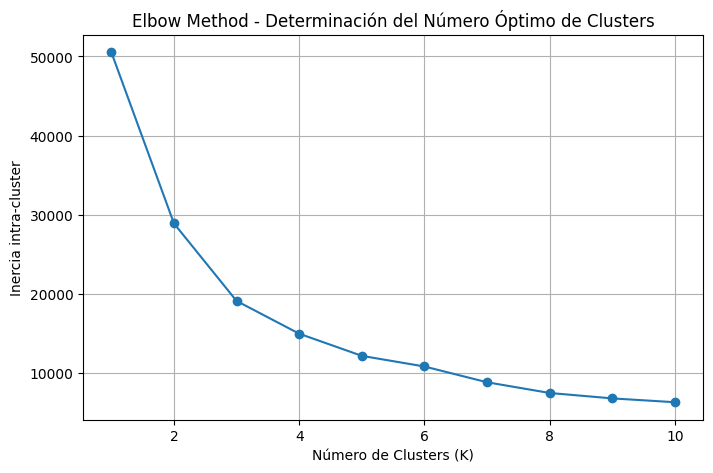

In [6]:
# Evaluación de la inercia para distintos valores de K.
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Determinación del Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia intra-cluster')
plt.grid()
plt.show()

Silhouette Score para k=2: 0.4052
Silhouette Score para k=3: 0.3979
Silhouette Score para k=4: 0.4128
Silhouette Score para k=5: 0.4034
Silhouette Score para k=6: 0.3839
Silhouette Score para k=7: 0.3861
Silhouette Score para k=8: 0.4149
Silhouette Score para k=9: 0.3893
Silhouette Score para k=10: 0.4056


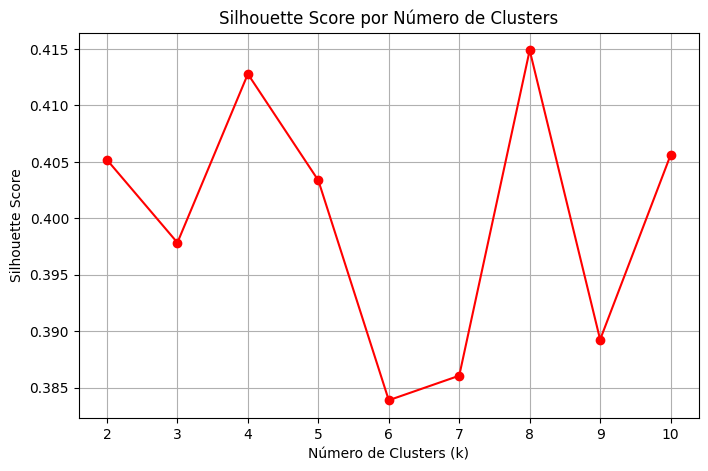

In [7]:
# Calcular silhouette scores para k de 2 a 10
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette.append(score)
    print(f"Silhouette Score para k={k}: {score:.4f}")

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette, 'ro-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por Número de Clusters')
plt.grid(True)
plt.show()

In [8]:
clusters = 4 # Número óptimo de clusters determinado visualmente.
print(f"El número óptimo de clusters es: {clusters}")

El número óptimo de clusters es: 4


In [9]:
kmeans = KMeans(n_clusters=clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

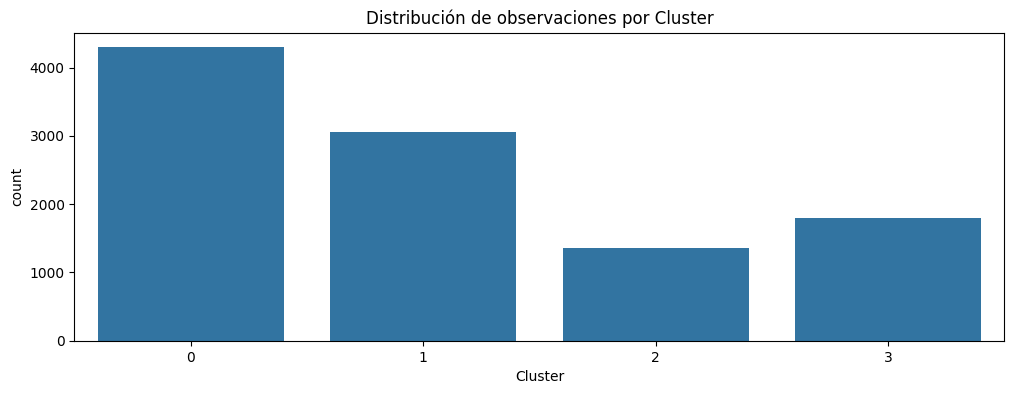

In [10]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Cluster', data=df)
plt.title('Distribución de observaciones por Cluster')
plt.show()

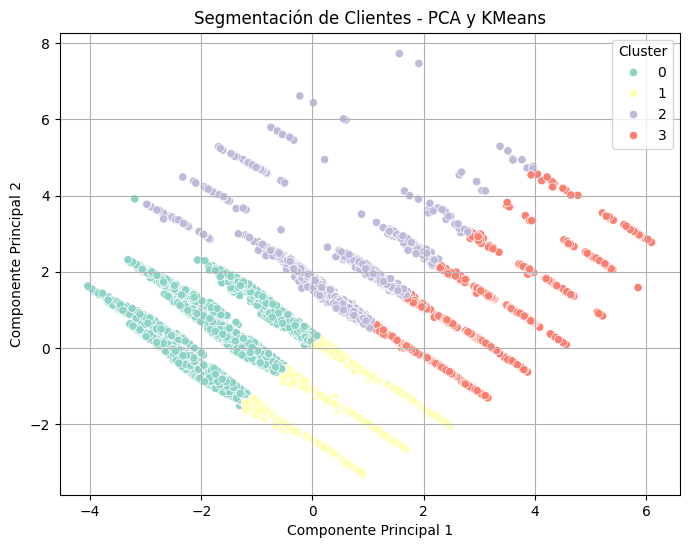

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set3')
plt.title('Segmentación de Clientes - PCA y KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.legend(title='Cluster')
plt.show()

In [12]:
# Calculamos la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Sumamos la varianza de los dos primeros componentes
var_total_2componentes = varianza_explicada[0] + varianza_explicada[1]

print(f"Varianza explicada por los 2 primeros componentes: {var_total_2componentes:.4f} ({var_total_2componentes*100:.2f}%)")  

Varianza explicada por los 2 primeros componentes: 0.5983 (59.83%)


In [13]:
# Cargas de las variables
cargas = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=numeric_cols
)

print("\nCargas de las variables:")
display(cargas.round(4))


Cargas de las variables:


,PC1,PC2
Edad,-0.3990,0.3007
Ingresos_anuales_brutos,-0.3769,0.4260
Experiencia_laboral,-0.3181,0.2721
Gasto_medio_mensual_cuota,-0.2951,0.3927
Dias_cliente,-0.0131,0.0092
Digital_encuesta,0.1044,-0.1044
Family_Size,0.7066,0.6992


In [14]:
# Detectar variables con aportación < 0.2 en ambos componentes
cargas_abs = cargas.abs()
variables_poco_aporte = cargas_abs[(cargas_abs['PC1'] < 0.2) & (cargas_abs['PC2'] < 0.2)]


# Eliminar variables con poco aporte
variables_a_quitar = variables_poco_aporte.index.tolist()
print(f"\nVariables eliminadas: {variables_a_quitar}")

# Crear nuevo dataset con solo las variables útiles
X_filtrado = X.drop(columns=variables_a_quitar)

# Escalar de nuevo

scaler = StandardScaler()
X_scaled_filtrado = scaler.fit_transform(X_filtrado)

# Nuevo PCA con 2 componentes
pca_filtrado = PCA(n_components=2)
X_pca_filtrado = pca_filtrado.fit_transform(X_scaled_filtrado)

# Varianza explicada total
var_total = pca_filtrado.explained_variance_ratio_.sum()
print(f"\nVarianza explicada con variables filtradas: {var_total:.4f} ({var_total*100:.2f}%)")

# Nuevas cargas
cargas_filtradas = pd.DataFrame(
    pca_filtrado.components_.T,
    columns=['PC1', 'PC2'],
    index=X_filtrado.columns
)

print("\nNuevas cargas tras filtrar variables:")
display(cargas_filtradas.round(4))



Variables eliminadas: ['Dias_cliente', 'Digital_encuesta']

Varianza explicada con variables filtradas: 0.7356 (73.56%)

Nuevas cargas tras filtrar variables:


,PC1,PC2
Edad,0.5008,-0.1690
Ingresos_anuales_brutos,0.5072,0.2685
Experiencia_laboral,0.5250,-0.0821
Gasto_medio_mensual_cuota,0.4037,0.4536
Family_Size,-0.2311,0.8288


In [15]:
# Seleccionar solo las columnas numéricas (excluyendo ID y categóricas ya codificadas)
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_excluir = ['ID', 'Cluster']
columnas_utiles = [col for col in columnas_numericas if col not in columnas_excluir]

X_todas = df[columnas_utiles]

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_todas)

# PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada total
varianza = pca.explained_variance_ratio_
print(f"Varianza explicada total (2 componentes): {varianza.sum():.4f} ({varianza.sum()*100:.2f}%)")

# Cargas de las variables
cargas = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X_todas.columns
)

print("\nCargas de las variables:")
display(cargas.round(4))

Varianza explicada total (2 componentes): 0.2702 (27.02%)

Cargas de las variables:


,PC1,PC2
Genero,-0.0147,-0.0045
Casado,-0.3124,-0.0037
Edad,-0.3987,-0.0165
Graduado,-0.1660,0.0249
Experiencia_laboral,-0.3889,0.0057
Gastoscore,-0.2372,-0.0146
Family_Size,0.1290,-0.0104
anno_nacimiento,0.3988,0.0169
Generacion,0.4003,0.0085
Ingresos_anuales_brutos,-0.3108,0.0281


In [16]:
# 1. Cálculo de cargas absolutas
cargas_abs = cargas.abs()

# 2. Filtrar variables que tengan < 0.2 en ambos componentes
variables_poco_aporte = cargas_abs[(cargas_abs['PC1'] < 0.2) & (cargas_abs['PC2'] < 0.2)]
variables_a_quitar = variables_poco_aporte.index.tolist()

print("📉 Variables con poca aportación al PCA (se eliminarán):")
print(variables_a_quitar)

# 3. Dataset filtrado
X_filtrado = X_todas.drop(columns=variables_a_quitar)
X_scaled_filtrado = scaler.fit_transform(X_filtrado)

# 4. Nuevo PCA con variables útiles
pca_filtrado = PCA(n_components=2)
X_pca_filtrado = pca_filtrado.fit_transform(X_scaled_filtrado)

# 5. Nueva varianza explicada y cargas
varianza_filtrada = pca_filtrado.explained_variance_ratio_.sum()
print(f"\nVarianza explicada con variables filtradas: {varianza_filtrada:.4f} ({varianza_filtrada*100:.2f}%)")

cargas_filtradas = pd.DataFrame(
    pca_filtrado.components_.T,
    columns=['PC1', 'PC2'],
    index=X_filtrado.columns
)

print("\nNuevas cargas tras filtrar variables:")
display(cargas_filtradas.round(4))


📉 Variables con poca aportación al PCA (se eliminarán):
['Genero', 'Graduado', 'Family_Size', 'Digital_encuesta', 'zonas_Norte', 'zonas_Oeste', 'zonas_Sur', 'ambito_laboral_Finanzas', 'ambito_laboral_Otros', 'ambito_laboral_Salud', 'ambito_laboral_Servicios Publicos', 'ambito_laboral_Tecnologia/Industria', 'Campanna_anno_5.0']

Varianza explicada con variables filtradas: 0.5164 (51.64%)

Nuevas cargas tras filtrar variables:


,PC1,PC2
Casado,-0.3251,0.0015
Edad,-0.4167,-0.0082
Experiencia_laboral,-0.3949,0.0034
Gastoscore,-0.2539,-0.0083
anno_nacimiento,0.4168,0.0085
Generacion,0.4118,0.0054
Ingresos_anuales_brutos,-0.3188,0.0265
Gasto_medio_mensual_cuota,-0.2270,0.0194
Abandono,-0.0104,-0.3966
Dias_cliente,-0.0054,0.6758


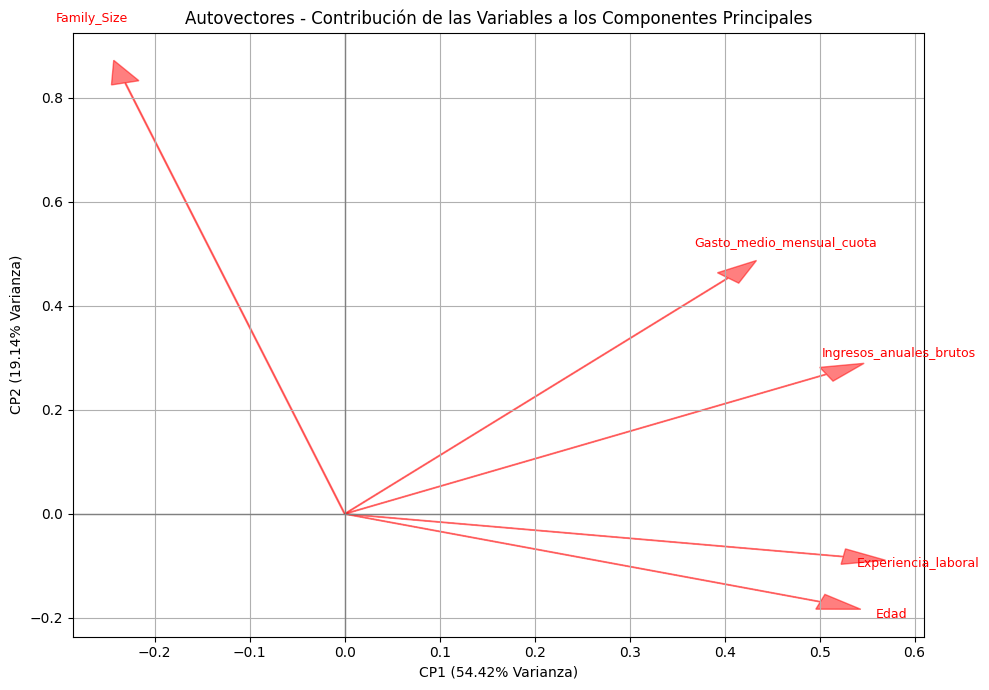

In [17]:
# 1. Selección de variables que usaste para obtener 59.83% de varianza
columnas_pca = ['Edad', 'Ingresos_anuales_brutos', 'Experiencia_laboral',
                'Gasto_medio_mensual_cuota', 'Family_Size']
X = df[columnas_pca]

# 2. Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Cargar autovectores (componentes) y varianza explicada
components = pca.components_
explained_variance = pca.explained_variance_ratio_ * 100  # en %

# 5. Nombres de las variables
features = np.array(X.columns)

# 6. Gráfico de autovectores
plt.figure(figsize=(10, 7))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

for i in range(len(features)):
    plt.arrow(0, 0, components[0, i], components[1, i],
              color='r', alpha=0.5, head_width=0.03)
    plt.text(components[0, i] * 1.15, components[1, i] * 1.15,
             features[i], color='r', ha='center', va='center', fontsize=9)

plt.xlabel(f"CP1 ({explained_variance[0]:.2f}% Varianza)")
plt.ylabel(f"CP2 ({explained_variance[1]:.2f}% Varianza)")
plt.title("Autovectores - Contribución de las Variables a los Componentes Principales")
plt.grid()
plt.tight_layout()
plt.show()